In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import math

In [13]:
df = pd.read_csv("GOOGL (1).csv")  # Ensure the CSV has a 'Close' column
df = df[['Date', 'Close']]
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [14]:
# 📊 Preprocess Data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

training_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_data_len]

In [15]:
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)


In [16]:
# 🧠 Build RNN Model
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

C:\Users\kaila\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# 🔁 Train the Model
model.fit(x_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0075
Epoch 2/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 7.0201e-04
Epoch 3/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 4.7698e-04
Epoch 4/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 3.1438e-04
Epoch 5/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.6441e-04
Epoch 6/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 2.5055e-04
Epoch 7/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 2.4549e-04
Epoch 8/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.8451e-04
Epoch 9/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7329e-04
Epoch 10/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7289e-04
Epoch 11/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.7620e-04
Epoch 12/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.4124e-04
Epoch 13/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.5535e-04
Epoch 14/20
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 1.

In [18]:
# 📈 Prepare Test Data
test_data = scaled_data[training_data_len - 60:]
x_test = []
y_test = data[training_data_len:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [19]:
# 🔮 Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [20]:
# 📉 Evaluate the Model
rmse = math.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 104.4659207917887


In [21]:
# 📊 Plot Results
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

C:\Users\kaila\AppData\Local\Temp\ipykernel_24196\1658507054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


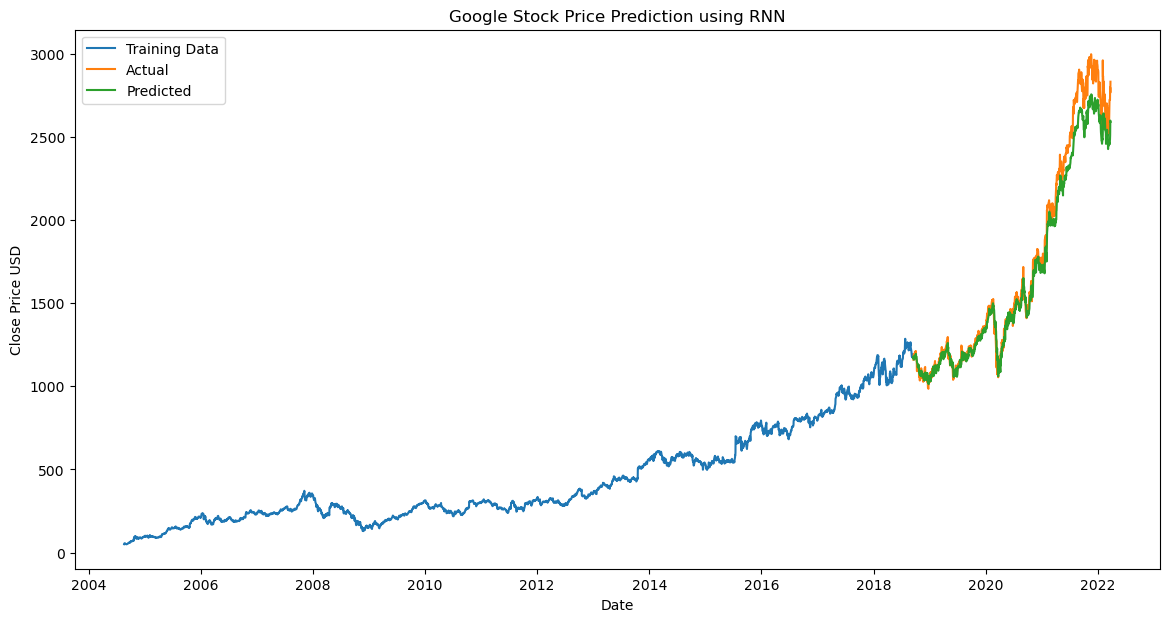

In [22]:
plt.figure(figsize=(14, 7))
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid[['Close', 'Predictions']], label=['Actual', 'Predicted'])
plt.legend()
plt.show()